# House Prices - Advanced Regression Technique

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train_df=pd.read_csv(r'C:\Users\msdan\Desktop\project\New folder\train.csv')
test_df=pd.read_csv(r'C:\Users\msdan\Desktop\project\New folder\test.csv')

In [3]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
test_df['SalePrice'] = 0

In [6]:
Comb_data = pd.concat([train_df, test_df], keys=('x', 'y'))
Comb_data =Comb_data.drop(["Id"], axis = 1)
#Comb_data=Combined Data here,after combining test and train csv files

In [7]:
Comb_data.shape

(2919, 80)

In [8]:
null_pct=(Comb_data.isnull().sum()/Comb_data.shape[0]*100).sort_values(ascending=False)
null_pct

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
                  ...    
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [9]:
column_drop=null_pct[null_pct>30].keys()

In [10]:
Comb_data=Comb_data.drop(column_drop, "columns")

In [11]:
Comb_data.shape

(2919, 75)

In [12]:
Comb_data['SalePrice']

x  0       208500
   1       181500
   2       223500
   3       140000
   4       250000
            ...  
y  1454         0
   1455         0
   1456         0
   1457         0
   1458         0
Name: SalePrice, Length: 2919, dtype: int64

In [13]:
Comb_data.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [14]:
Comb_data['LotFrontage'] = Comb_data['LotFrontage'].fillna(Comb_data['LotFrontage'].mean())
Comb_data['BsmtFinSF1'] = Comb_data['BsmtFinSF1'].fillna(Comb_data['BsmtFinSF1'].mean())
Comb_data['BsmtFinSF2'] = Comb_data['BsmtFinSF2'].fillna(Comb_data['BsmtFinSF2'].mean())
Comb_data['BsmtUnfSF'] = Comb_data['BsmtUnfSF'].fillna(Comb_data['BsmtUnfSF'].mean())
Comb_data['TotalBsmtSF'] = Comb_data['TotalBsmtSF'].fillna(Comb_data['TotalBsmtSF'].mean())
Comb_data['GarageCars'] = Comb_data['GarageCars'].fillna(Comb_data['GarageCars'].mean())
Comb_data['GarageArea'] = Comb_data['GarageArea'].fillna(Comb_data['GarageArea'].mean())
Comb_data['MSZoning'] = Comb_data['MSZoning'].fillna(Comb_data['MSZoning'].mode()[0])
Comb_data['MasVnrType'] = Comb_data['MasVnrType'].fillna(Comb_data['MasVnrType'].mode()[0])
Comb_data['BsmtQual'] = Comb_data['BsmtQual'].fillna(Comb_data['BsmtQual'].mode()[0])
Comb_data['BsmtCond'] = Comb_data['BsmtCond'].fillna(Comb_data['BsmtCond'].mode()[0])
Comb_data['BsmtExposure'] = Comb_data['BsmtExposure'].fillna(Comb_data['BsmtExposure'].mode()[0])
Comb_data['BsmtFinType1'] = Comb_data['BsmtFinType1'].fillna(Comb_data['BsmtFinType1'].mode()[0])
Comb_data['BsmtFinType2'] = Comb_data['BsmtFinType2'].fillna(Comb_data['BsmtFinType2'].mode()[0])
Comb_data['GarageType'] =Comb_data['GarageType'].fillna(Comb_data['GarageType'].mode()[0])
Comb_data['GarageFinish'] = Comb_data['GarageFinish'].fillna(Comb_data['GarageFinish'].mode()[0])
Comb_data['GarageQual'] =Comb_data['GarageQual'].fillna(Comb_data['GarageQual'].mode()[0])
Comb_data['GarageCond'] = Comb_data['GarageCond'].fillna(Comb_data['GarageCond'].mode()[0])
Comb_data['SaleType'] =Comb_data['SaleType'].fillna(Comb_data['SaleType'].mode()[0])
Comb_data['Utilities'] = Comb_data['Utilities'].fillna(Comb_data['Utilities'].mode()[0])
Comb_data['Exterior1st'] = Comb_data['Exterior1st'].fillna(Comb_data['Exterior1st'].mode()[0])
Comb_data['Exterior2nd'] = Comb_data['Exterior2nd'].fillna(Comb_data['Exterior2nd'].mode()[0])
Comb_data['Electrical'] = Comb_data['Electrical'].fillna(Comb_data['Electrical'].mode()[0])
Comb_data['Functional'] = Comb_data['Functional'].fillna(Comb_data['Functional'].mode()[0])
Comb_data['MasVnrArea'] = Comb_data['MasVnrArea'].fillna(Comb_data['MasVnrArea'].mode()[0])
Comb_data['BsmtFullBath'] = Comb_data['BsmtFullBath'].fillna(Comb_data['BsmtFullBath'].mode()[0])
Comb_data['BsmtHalfBath'] = Comb_data['BsmtHalfBath'].fillna(Comb_data['BsmtHalfBath'].mode()[0])
Comb_data['KitchenQual'] = Comb_data['KitchenQual'].fillna(Comb_data['KitchenQual'].mode()[0])

In [15]:
Comb_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [16]:
Comb_data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.390118,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.006309,-0.064302,-0.072520,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.036083
LotFrontage,-0.390118,1.000000,0.364382,0.204190,-0.068350,0.116905,0.085608,0.201090,0.203603,0.041396,...,0.106380,0.152160,0.010541,0.025255,0.069348,0.160857,0.035762,0.010337,-0.007265,0.153477
LotArea,-0.201730,0.364382,1.000000,0.100541,-0.035617,0.024128,0.021612,0.124728,0.194021,0.084055,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.162122
OverallQual,0.033638,0.204190,0.100541,1.000000,-0.093847,0.597554,0.571532,0.426528,0.281704,-0.042755,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.295558
OverallCond,-0.065625,-0.068350,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.133118,-0.050403,0.041489,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.020809
YearBuilt,0.034409,0.116905,0.024128,0.597554,-0.368477,1.000000,0.612235,0.307520,0.279547,-0.027591,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.193199
YearRemodAdd,0.043315,0.085608,0.021612,0.571532,0.047654,0.612235,1.000000,0.191668,0.152056,-0.062125,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.211347
MasVnrArea,0.006309,0.201090,0.124728,0.426528,-0.133118,0.307520,0.191668,1.000000,0.301398,-0.014637,...,0.166606,0.140880,-0.110614,0.014059,0.066392,0.004791,0.045156,-0.002216,-0.017654,0.186306
BsmtFinSF1,-0.064302,0.203603,0.194021,0.281704,-0.050403,0.279547,0.152056,0.301398,1.000000,-0.055045,...,0.223471,0.124153,-0.099710,0.050908,0.096821,0.084462,0.093295,-0.000942,0.022556,0.148442
BsmtFinSF2,-0.072520,0.041396,0.084055,-0.042755,0.041489,-0.027591,-0.062125,-0.014637,-0.055045,1.000000,...,0.098389,-0.005875,0.032739,-0.023279,0.063301,0.044524,-0.005139,-0.009592,0.008883,-0.019285


In [17]:
## Categorical Features
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']
len(columns)

39

In [18]:
quantitative_columns = [column for column in train_df.columns 
                        if train_df.dtypes[column] in ['float64', 'int64']]


In [19]:
quantitative_columns.remove('SalePrice')
quantitative_columns.remove('Id')

In [20]:
test_id = test_df['Id']
train_df.drop(['Id'], axis=1, inplace=True)
test_df.drop(['Id'], axis=1, inplace=True)

In [21]:
train_input= train_df[quantitative_columns].values
test_input = test_df[quantitative_columns].values

In [22]:
scaler = StandardScaler().fit(train_input)

train_input = scaler.transform(train_input)
test_input = scaler.transform(test_input)

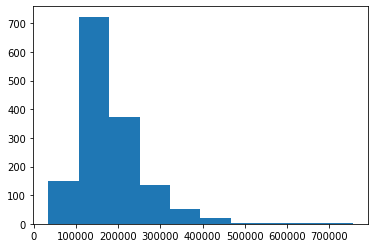

In [23]:
train_out = train_df.SalePrice.values
plt.hist(train_out);

Skew is: 0.12134661989685333


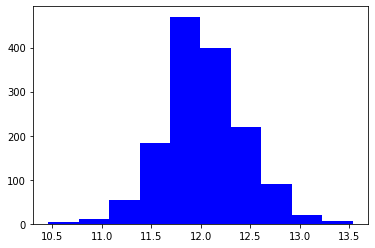

In [24]:
target = np.log1p(train_df.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [25]:
model = XGBRegressor()

In [26]:
model = model.fit(train_input,  np.log1p(train_df.SalePrice))

In [27]:
predictions = model.predict(test_input)

In [28]:
predictions = np.expm1(predictions)


In [29]:
df_predictions = pd.DataFrame.from_dict({
    'Id': test_id,
    'SalePrice': predictions
})
df_predictions

,Id,SalePrice
0,1461,126047.734375
1,1462,165874.437500
2,1463,190098.156250
3,1464,191613.968750
4,1465,183301.421875
...,...,...
1454,2915,75914.718750
1455,2916,85358.953125
1456,2917,184160.359375
1457,2918,112616.242188


In [37]:
df_predictions.round(0)

,Id,SalePrice
0,1461,126048.0
1,1462,165874.0
2,1463,190098.0
3,1464,191614.0
4,1465,183301.0
...,...,...
1454,2915,75915.0
1455,2916,85359.0
1456,2917,184160.0
1457,2918,112616.0


In [38]:
df_predictions.to_csv('submission.csv', index=False)